In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,loan_amnt,loan_status,cb_person_default_on_file
0,22,59000,35000,1,Y
1,21,9600,1000,0,N
2,25,9600,5500,1,N
3,23,65500,35000,1,N
4,24,54400,35000,1,Y


In [9]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['cb_person_default_on_file']=le.fit_transform(data['cb_person_default_on_file'])
data

,person_age,person_income,loan_amnt,loan_status,cb_person_default_on_file
0,22,59000,35000,1,1
1,21,9600,1000,0,0
2,25,9600,5500,1,0
3,23,65500,35000,1,0
4,24,54400,35000,1,1
...,...,...,...,...,...
32576,57,53000,5800,0,0
32577,54,120000,17625,0,0
32578,65,76000,35000,1,0
32579,56,150000,15000,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_7624\540076178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cb_person_default_on_file'])


<Axes: xlabel='cb_person_default_on_file', ylabel='Density'>

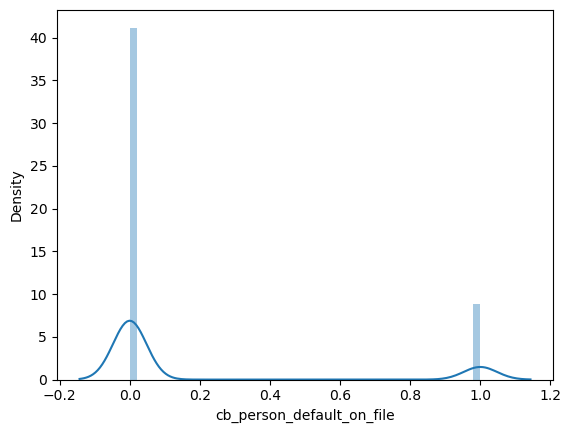

In [10]:
sns.distplot(data['cb_person_default_on_file'])


In [11]:
data.head(2)

,person_age,person_income,loan_amnt,loan_status,cb_person_default_on_file
0,22,59000,35000,1,1
1,21,9600,1000,0,0


In [12]:
x=data.iloc[:,:-2]
x.head(1)

,person_age,person_income,loan_amnt
0,22,59000,35000


In [13]:
y=data.cb_person_default_on_file

In [14]:
y.shape

(32581,)

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (24435, 3)

Training data-y- Shape:	 (24435,)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (8146, 3)

Testing data(y-Outcome) Shape:	 (8146,)


# Base Model

# Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('*'*100)
print('Linear Regression Model')
print('*'*100)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',lin_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_lin_reg=lin_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(mean_squared_error(ytest,ypred_lin_reg))
print('Accuracy Score - Linear Regression:\t',Accuracy_lin_reg)
print()
print('MSE-linear Regression:\t',MSE_lin_reg)
print()
print('RMSE linear Regression:\t',RMSE_lin_reg)

****************************************************************************************************
Linear Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - Linear Regression:	 0.0011508981098617976

MSE-linear Regression:	 0.14748662217269376

RMSE linear Regression:	 0.3840398705508241


# 2. KNN Regression

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('*'*100)
print('KNN Regression Model')
print('*'*100)
print('\n Training Phase')
knn_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',knn_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_knn=knn_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('KNN Regression - Performance Measures')
print('*'*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn)
MSE_knn=mean_squared_error(ytest,ypred_knn)
RMSE_knn=np.sqrt(mean_squared_error(ytest,ypred_knn))
print('Accuracy Score - knn Regression:\t',Accuracy_knn_reg)
print()
print('MSE-knn Regression:\t',MSE_knn)
print()
print('RMSE knn Regression:\t',RMSE_knn)

****************************************************************************************************
KNN Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
KNN Regression - Performance Measures
****************************************************************************************************
Accuracy Score - knn Regression:	 -0.284307035846443

MSE-knn Regression:	 0.18963635867637832

RMSE knn Regression:	 0.43547256937306433


# 3. Decision Tree Regression Model

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
print('*'*100)
print('DT Regression Model')
print('*'*100)
print('\n Training Phase')
dt_reg.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_reg.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_dt_reg=dt_reg.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('Linear Regression - Performance Measures')
print('*'*100)
Accuracy_dt_reg=r2_score(ytest,ypred_dt_reg)
MSE_dt_reg=mean_squared_error(ytest,ypred_dt_reg)
RMSE_dt_reg=np.sqrt(mean_squared_error(ytest,ypred_dt_reg))
print('Accuracy Score - DT Regression:\t',Accuracy_dt_reg)
print()
print('MSE-DT Regression:\t',MSE_dt_reg)
print()
print('RMSE DT Regression:\t',RMSE_dt_reg)


****************************************************************************************************
DT Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
Linear Regression - Performance Measures
****************************************************************************************************
Accuracy Score - DT Regression:	 -0.7683221948137637

MSE-DT Regression:	 0.2611043719542449

RMSE DT Regression:	 0.5109837296374953


# 4.Support Vector Regressor

In [20]:
from sklearn.svm import SVR
svr=SVR()
print('*'*100)
print('SVR Regression Model')
print('*'*100)
print('\n Training Phase')
svr.fit(xtrain,ytrain)
print('Hyperparameter:\n',svr.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_svr=svr.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('SVR Regression - Performance Measures')
print('*'*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(mean_squared_error(ytest,ypred_svr))
print('Accuracy Score - SVR Regression:\t',Accuracy_svr)
print()
print('MSE-SVR Regression:\t',MSE_svr)
print()
print('RMSE SVR Regression:\t',RMSE_svr)

****************************************************************************************************
SVR Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
SVR Regression - Performance Measures
****************************************************************************************************
Accuracy Score - SVR Regression:	 -0.043383201223222256

MSE-SVR Regression:	 0.15406237407526913

RMSE SVR Regression:	 0.3925078012922407


# 6. Boosting - GradientBoost

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=15)
print('*'*100)
print('GradientBoosting Regression Model')
print('*'*100)
print('\n Training Phase')
grad_boost.fit(xtrain,ytrain)
print('Hyperparameter:\n',grad_boost.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred_grad_boost=grad_boost.predict(xtest)
#print('Predicted values for the test samples:\n',ypred_lin_reg)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import r2_score,mean_squared_error
print('*'*100)
print('GradientBoosting Regression - Performance Measures')
print('*'*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(mean_squared_error(ytest,ypred_grad_boost))
print('Accuracy Score - GradientBoosting Regression:\t',Accuracy_grad_boost)
print()
print('MSE-GradientBoosting Regression:\t',MSE_grad_boost)
print()
print('RMSE GradientBoosting Regression:\t',RMSE_grad_boost)


****************************************************************************************************
GradientBoosting Regression Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Training Completed

 Test Phase

Testing completed
****************************************************************************************************
GradientBoosting Regression - Performance Measures
********************************************************************

# Model with Accuracy scores

In [23]:
scores=[('Linear Regression',Accuracy_lin_reg),
 ('KNN Regression',Accuracy_knn_reg),
 ('Decision Tree Regression',Accuracy_dt_reg),
 ('SVR',Accuracy_svr),
 ('Gradient Boost Regressor',Accuracy_grad_boost),
 
 ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))


                      Model  Accuracy_score
4  Gradient Boost Regressor        0.004866
0         Linear Regression        0.001151
3                       SVR       -0.043383
1            KNN Regression       -0.284307
2  Decision Tree Regression       -0.768322
